### 1. Data Cleaning

The dataset contains exact dates for all records. However, the spatial data is not consistant and further cleaning is needed. 

In [2]:
import pandas as pd

# Reload the CSV file into a DataFrame
df = pd.read_csv('./data/fatalities_isr_pse_conflict_2000_to_2023.csv')

# Region mapping for all locations
region_mapping = {
    # Known districts of Israel
    'Israel': 'Israel',
    # Known districts of the West Bank
    'Tulkarm': 'West Bank', 
    'Jenin': 'West Bank', 
    'Jericho': 'West Bank', 
    'Hebron': 'West Bank', 
    'Tubas': 'West Bank',
    'Ramallah and al-Bira': 'West Bank', 
    'East Jerusalem': 'West Bank', 
    'Nablus': 'West Bank', 
    'Qalqiliya': 'West Bank',
    'Bethlehem': 'West Bank', 
    'Salfit': 'West Bank',
    # Known districts and areas of the Gaza Strip
    'Gaza': 'Gaza Strip', 
    'Khan Yunis': 'Gaza Strip', 
    'Deir al-Balah': 'Gaza Strip', 
    'North Gaza': 'Gaza Strip',
    'Rafah': 'Gaza Strip', 
    'Gaza Strip': 'Gaza Strip', 
    'Gush Katif': 'Gaza Strip',
    # 'al-Quds' is another name for 'East Jerusalem'
    'al-Quds': 'West Bank'
}

# Applying the region mapping to create a new 'region_category' column
df['region_category'] = df['event_location_district'].map(region_mapping)


### 2. Analysis

Death over time by citizenship. 

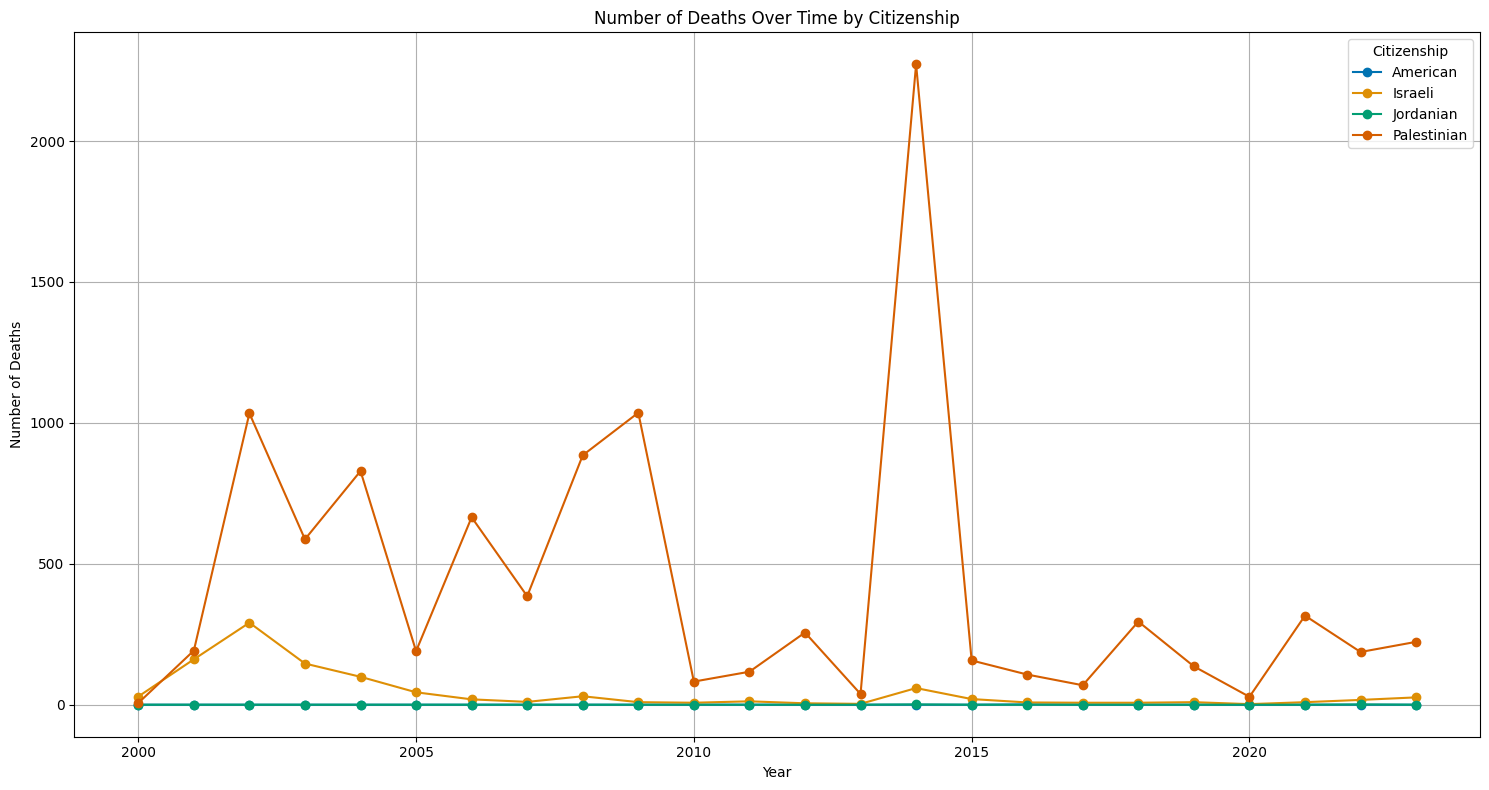

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by year and citizenship and count the number of fatalities
df['date_of_event'] = pd.to_datetime(df['date_of_event'], errors='coerce')
deaths_over_time_by_citizenship = df.groupby([df['date_of_event'].dt.year, 'citizenship']).size().unstack(fill_value=0)

# Plotting the data with the color-blind friendly palette
color_palette = sns.color_palette("colorblind")
plt.figure(figsize=(15, 8))

# Plotting the data with a line chart
for (citizenship, color) in zip(deaths_over_time_by_citizenship.columns, color_palette):
    plt.plot(deaths_over_time_by_citizenship.index, deaths_over_time_by_citizenship[citizenship], marker='o', color=color, label=citizenship)

plt.title('Number of Deaths Over Time by Citizenship')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Citizenship')
plt.grid(True)
plt.tight_layout()

# Save the figure
color_blind_friendly_chart_path = './data/deaths_over_time_by_citizenship_line.png'
plt.savefig(color_blind_friendly_chart_path)

Death over time by region. 

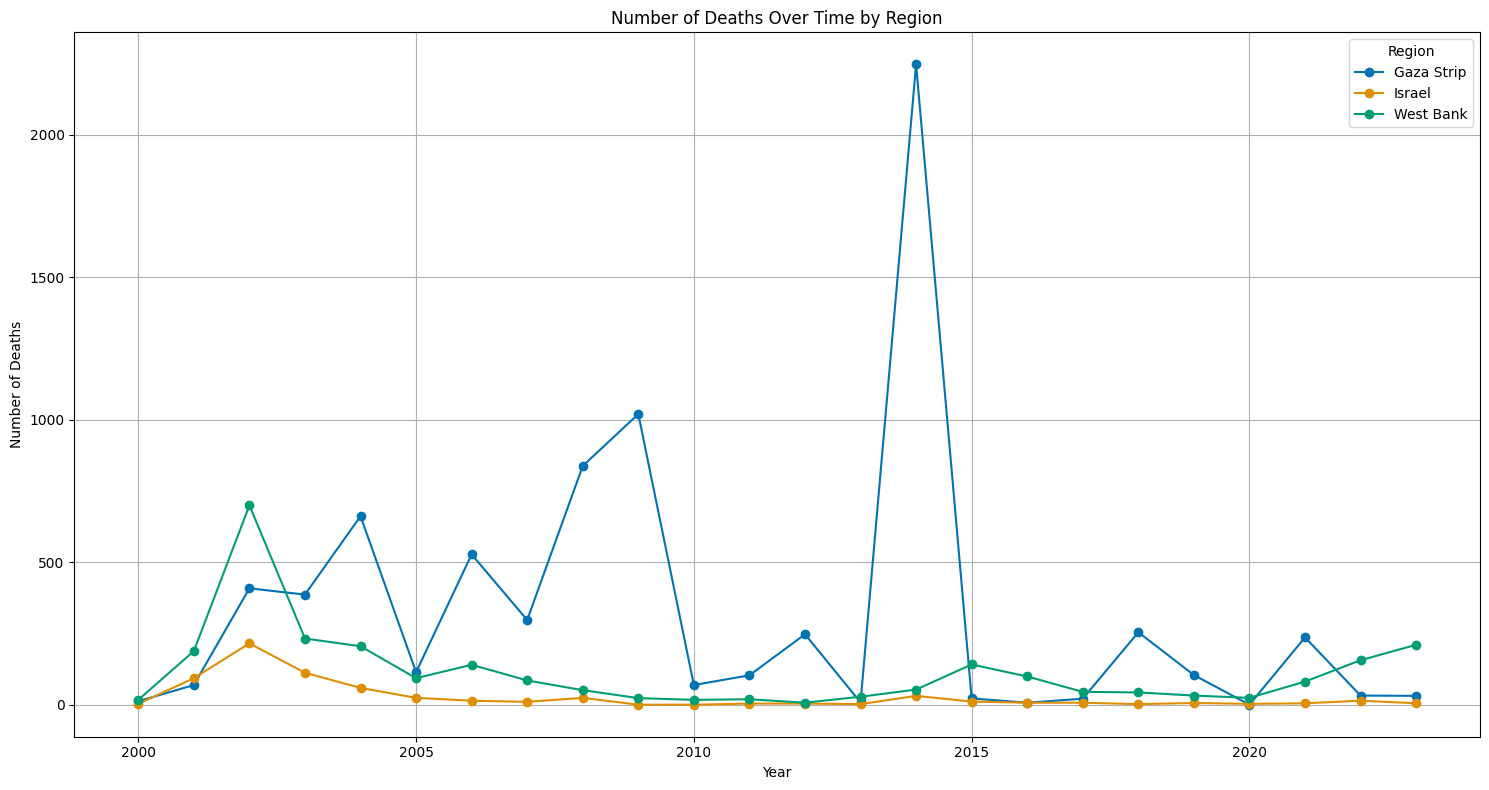

In [4]:
# Group the data by year and revised region category and count the number of fatalities
deaths_over_time_by_region = df.groupby([df['date_of_event'].dt.year, 'region_category']).size().unstack(fill_value=0)

# Plotting the data with a line chart
plt.figure(figsize=(15, 8))
for (region, color) in zip(deaths_over_time_by_region.columns, color_palette):
    plt.plot(deaths_over_time_by_region.index, deaths_over_time_by_region[region], marker='o', color=color, label=region)

plt.title('Number of Deaths Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()

# Save the figure
deaths_by_region_path = './data/deaths_over_time_by_region.png'
plt.savefig(deaths_by_region_path)

Casulties of women and children

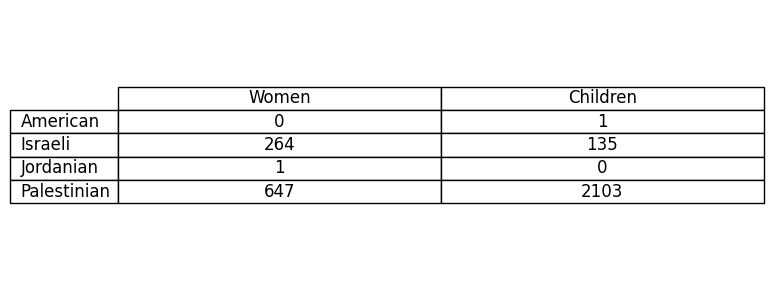

In [6]:
# Define women as individuals of female gender aged 18 and above
# Define children as individuals under the age of 18
df_women = df[(df['gender'] == 'F') & (df['age'] >= 18)]
df_children = df[df['age'] < 18]

# Group by citizenship and count the number of fatalities
deaths_women_by_citizenship = df_women.groupby('citizenship').size()
deaths_children_by_citizenship = df_children.groupby('citizenship').size()

# Create a DataFrame for better visualization
deaths_by_citizenship_df = pd.DataFrame({
    'Women': deaths_women_by_citizenship,
    'Children': deaths_children_by_citizenship
})


# Replace NaN with 0 and convert to integers
deaths_by_citizenship_df = deaths_by_citizenship_df.fillna(0).astype(int)

# Now let's create the table image
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
tbl = ax.table(
    cellText=deaths_by_citizenship_df.values,
    colLabels=deaths_by_citizenship_df.columns,
    rowLabels=deaths_by_citizenship_df.index,
    loc='center',
    cellLoc='center',
    colLoc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)
plt.tight_layout()

# Save the figure
plt.savefig('./data/casulties_of_women_and_children.png', transparent=True)